In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows = 6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [3]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [4]:
gdp_df.shape

(6868, 4)

In [5]:
internet_df.shape

(4495, 4)

In [6]:
type(gdp_df)

pandas.core.frame.DataFrame

In [7]:
type(internet_df)

pandas.core.frame.DataFrame

In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [9]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [10]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [11]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [12]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [13]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [14]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [15]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [16]:
gdp_and_internet_use = gdp_df.merge(internet_df, how = 'outer', on = ['Country', 'Year'])
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [17]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


In [38]:
gdp_net_subset = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]
gdp_net_subset

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


In [19]:
sub_2004 = gdp_net_subset[gdp_net_subset['Year'].isin([2004])]
sub_2009 = gdp_net_subset[gdp_net_subset['Year'].isin([2009])]
sub_2014 = gdp_net_subset[gdp_net_subset['Year'].isin([2014])]

In [39]:
sub_2014.loc[sub_2014.Internet_Users_Pct == sub_2014.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.1495,98.16


In [40]:
sub_2014.loc[sub_2014.Internet_Users_Pct == sub_2014.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.0


In [22]:
sub_2004.sort_values(by = ['Internet_Users_Pct'], ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6019,Sweden,2004,44496.023401,83.89
2635,Iceland,2004,45145.545658,83.88
1462,Denmark,2004,50607.628971,80.93
4658,Norway,2004,60893.410993,77.69
7400,Korea (Rep. of),2004,NaN,72.70
...,...,...,...,...
6437,Tuvalu,2004,3336.952920,NaN
6617,Upper middle income,2004,8567.061394,NaN
6737,Vietnam,2004,3689.732423,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN


In [41]:
sub_2009.loc[sub_2009.Internet_Users_Pct == sub_2009.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2630,Iceland,2009,48177.084123,93.0


In [42]:
sub_2009.loc[sub_2009.Internet_Users_Pct == sub_2009.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7083,Dem. People's Rep. of Korea,2009,NaN,0.0


In [43]:
sub_2004.loc[sub_2004.Internet_Users_Pct == sub_2004.Internet_Users_Pct.max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6019,Sweden,2004,44496.023401,83.89


In [44]:
sub_2004.loc[sub_2004.Internet_Users_Pct == sub_2004.Internet_Users_Pct.min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7088,Dem. People's Rep. of Korea,2004,NaN,0.0


Text(0, 0.5, 'GDP Per Capita')

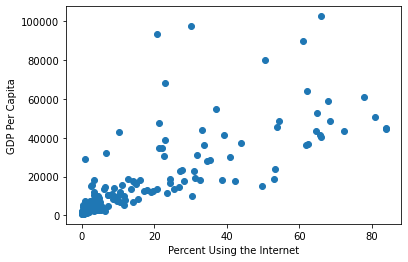

In [45]:
plt.scatter(data = sub_2004, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita')
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

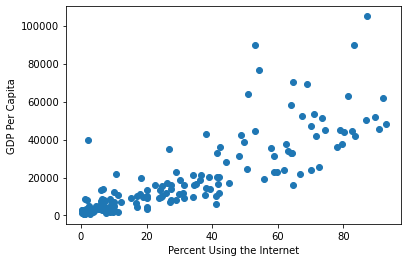

In [46]:
plt.scatter(data = sub_2009, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita')
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')

Text(0, 0.5, 'GDP Per Capita')

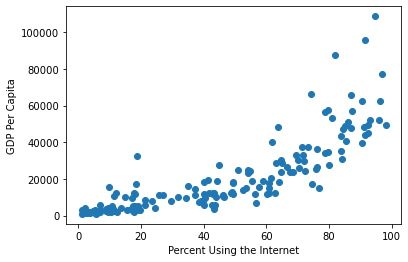

In [47]:
plt.scatter(data = sub_2014, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita')
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')

Generally over the years the percentage of use to GDP of different countries are equalizing out with the highest use coinciding with higher GDP.

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

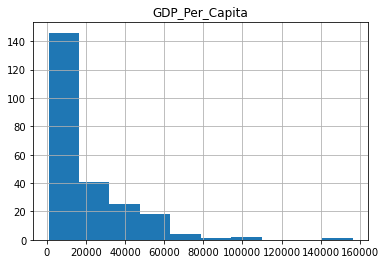

In [48]:
sub_2014.hist(column = 'GDP_Per_Capita')

array([[<AxesSubplot:title={'center':'Internet_Users_Pct'}>]],
      dtype=object)

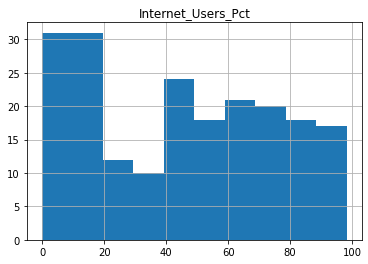

In [49]:
sub_2014.hist(column = 'Internet_Users_Pct')

In [50]:
top_5_2014 = sub_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)

In [51]:
top_5_list = top_5_2014.head().Country.tolist()

In [52]:
top_5_internet = gdp_net_subset[gdp_net_subset['Country'].isin(top_5_list)]
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
561,Bermuda,2014,77361.104881,96.800000
566,Bermuda,2009,89961.982744,83.250000
571,Bermuda,2004,90195.811033,60.990867
1452,Denmark,2014,52214.537753,95.990000
1457,Denmark,2009,50274.075696,86.840000
1462,Denmark,2004,50607.628971,80.930000
2625,Iceland,2014,49652.149500,98.160000
2630,Iceland,2009,48177.084123,93.000000
2635,Iceland,2004,45145.545658,83.880000
4648,Norway,2014,62589.373548,96.300000


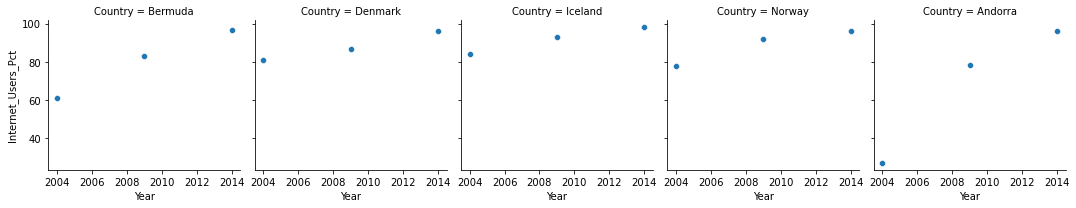

In [53]:
fg = sns.FacetGrid(top_5_internet, col = 'Country')
fg.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')

Bermuda has had the greatest growth between 2004 and 20014

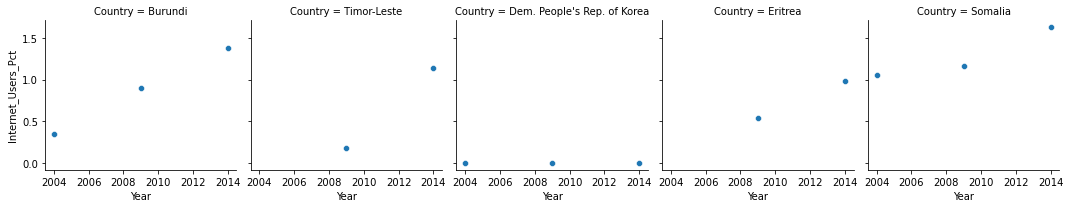

In [54]:
bottom_5_2014 = sub_2014.sort_values(by = 'Internet_Users_Pct', ascending = True)
bottom_5_list = bottom_5_2014.head().Country.tolist()
bottom_5_internet = gdp_net_subset[gdp_net_subset['Country'].isin(bottom_5_list)]
fg = sns.FacetGrid(bottom_5_internet, col = 'Country')
fg.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')

Timor-Leste has consistently had the lowest use of the internet.

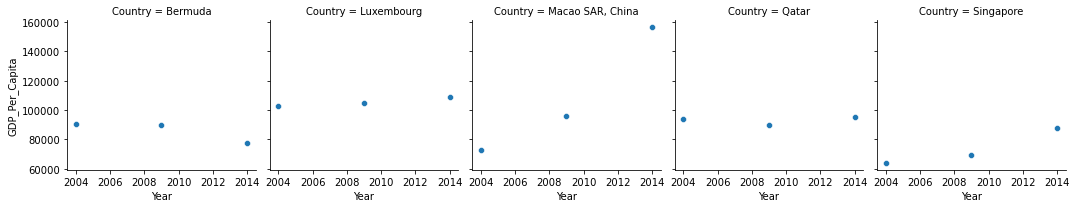

In [55]:
top_5_2014_GDP = sub_2014.sort_values(by = 'GDP_Per_Capita', ascending = False)
top_5_GDP_list = top_5_2014_GDP.head().Country.tolist()
top_5_GDP = gdp_net_subset[gdp_net_subset['Country'].isin(top_5_GDP_list)]
fg = sns.FacetGrid(top_5_GDP, col = 'Country')
fg.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')

bottom_5_2014_GDP = sub_2014.sort_values(by = 'GDP_Per_Capita', ascending = True
bottom_5_GDP_list = bottom_5_2014_GDP.head().Country.tolist()
bottom_5_GDP = gdp_net_subset[gdp_net_subset['Country'].isin(bottom_5_GDP_list)]
fg = sns.FacetGrid(bottom_5_GDP, col = 'Country')
fg.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')

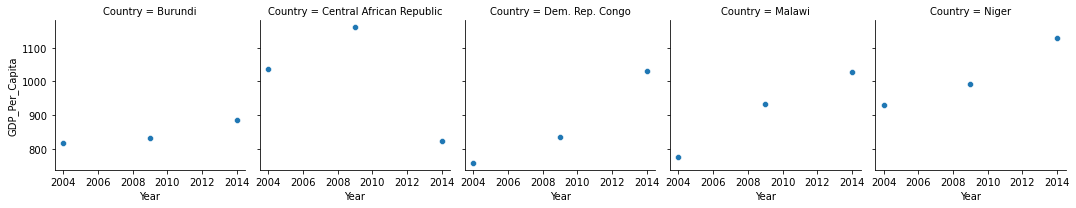

In [56]:
bottom_5_2014_GDP = sub_2014.sort_values(by = 'GDP_Per_Capita', ascending = True)
bottom_5_GDP_list = bottom_5_2014_GDP.head().Country.tolist()
bottom_5_GDP = gdp_net_subset[gdp_net_subset['Country'].isin(bottom_5_GDP_list)]
fg = sns.FacetGrid(bottom_5_GDP, col = 'Country')
fg.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')